In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [4]:
true_pi = torch.pi
true_pi

3.141592653589793

In [16]:
import torch
import torch.distributions as dist

def estimate_pi(N, seed):
    torch.manual_seed(seed)
    xy = torch.rand(N, 2)  # Generate N random points in [0, 1] × [0, 1]
    distance = torch.sqrt(xy[:, 0]**2 + xy[:, 1]**2)  # Calculate distance from the origin
    inside_circle = distance <= 1.0  # Check if point falls inside the quarter circle
    points_inside = torch.sum(inside_circle).item()  # Count points inside the quarter circle
    pi_estimate = (points_inside / N) * 4.0  # Calculate the π estimate
    return pi_estimate




Random Seed: 0
Random Seed: 1
Random Seed: 2
Random Seed: 3
Random Seed: 4
Random Seed: 5


In [40]:
# Different random seeds and sample sizes
random_seeds = [0, 1, 2, 3, 4, 5]
log_sample_sizes = [1, 2, 3, 4, 5, 6, 7, 8]
sample_sizes = [10**i for i in log_sample_sizes]

pi_estimates = []
for seed in random_seeds:
    for N in sample_sizes:
        pi_estimate = estimate_pi(N, seed)
        pi_estimates.append((seed, N, pi_estimate))

# Create a Pandas DataFrame from the list of tuples
df = pd.DataFrame(pi_estimates, columns=["seed", "N", "pi_estimate"])
df.head(10)

,seed,N,pi_estimate
0,0,10,3.200000
1,0,100,3.200000
2,0,1000,3.140000
3,0,10000,3.139200
4,0,100000,3.137200
5,0,1000000,3.140544
6,0,10000000,3.141136
7,0,100000000,3.141476
8,1,10,3.600000
9,1,100,2.880000


In [42]:
df_grouped = df.groupby("N").agg(["mean", "std"])["pi_estimate"]
df_grouped

,mean,std
N,,
10,3.200000,0.357771
100,3.120000,0.153883
1000,3.147333,0.090099
10000,3.147200,0.007065
100000,3.140580,0.007081
1000000,3.142121,0.001377
10000000,3.141548,0.000712
100000000,3.141659,0.000162


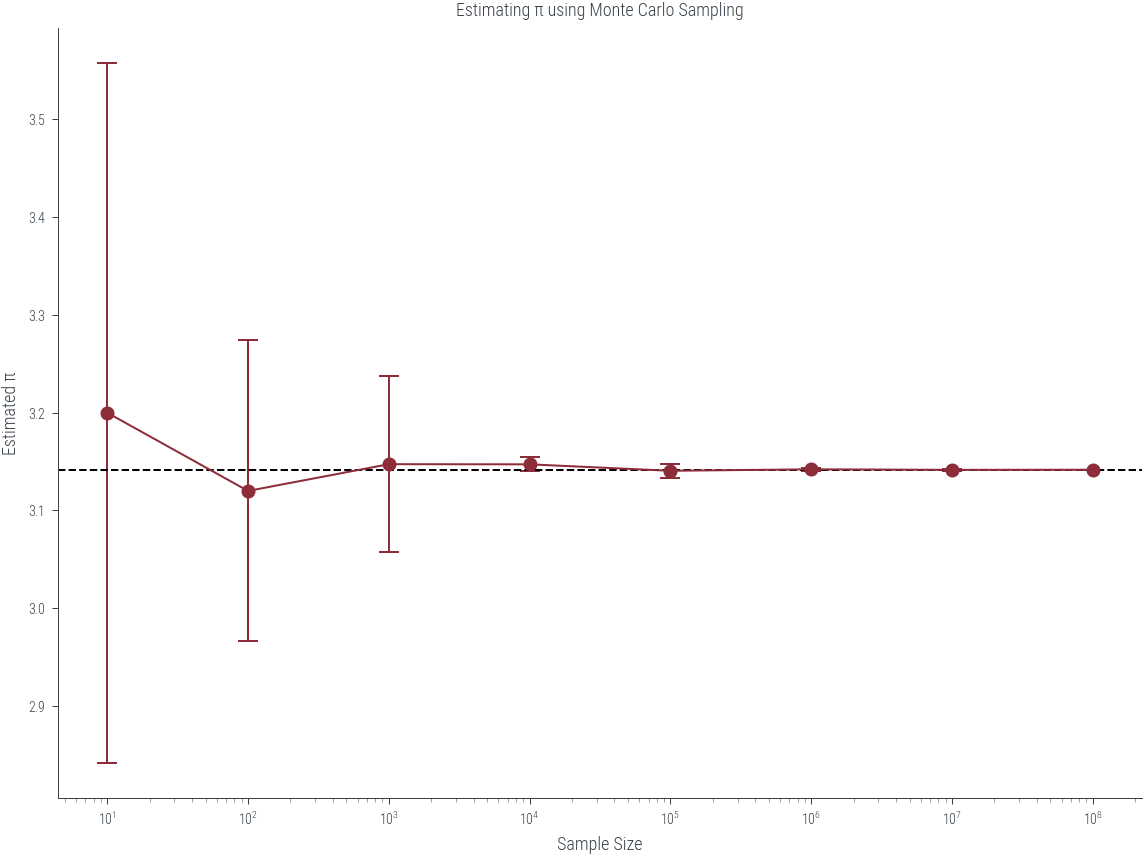

In [43]:
# Plot the estimates using mean and standard deviation
plt.figure(figsize=(8, 6))
df_grouped["mean"].plot(yerr=df_grouped["std"], capsize=5, marker="o")
plt.axhline(true_pi, color="black", linestyle="--")
plt.xlabel("Sample Size")
plt.ylabel("Estimated π")
plt.title("Estimating π using Monte Carlo Sampling")
# log scale on x-axis
plt.xscale("log")


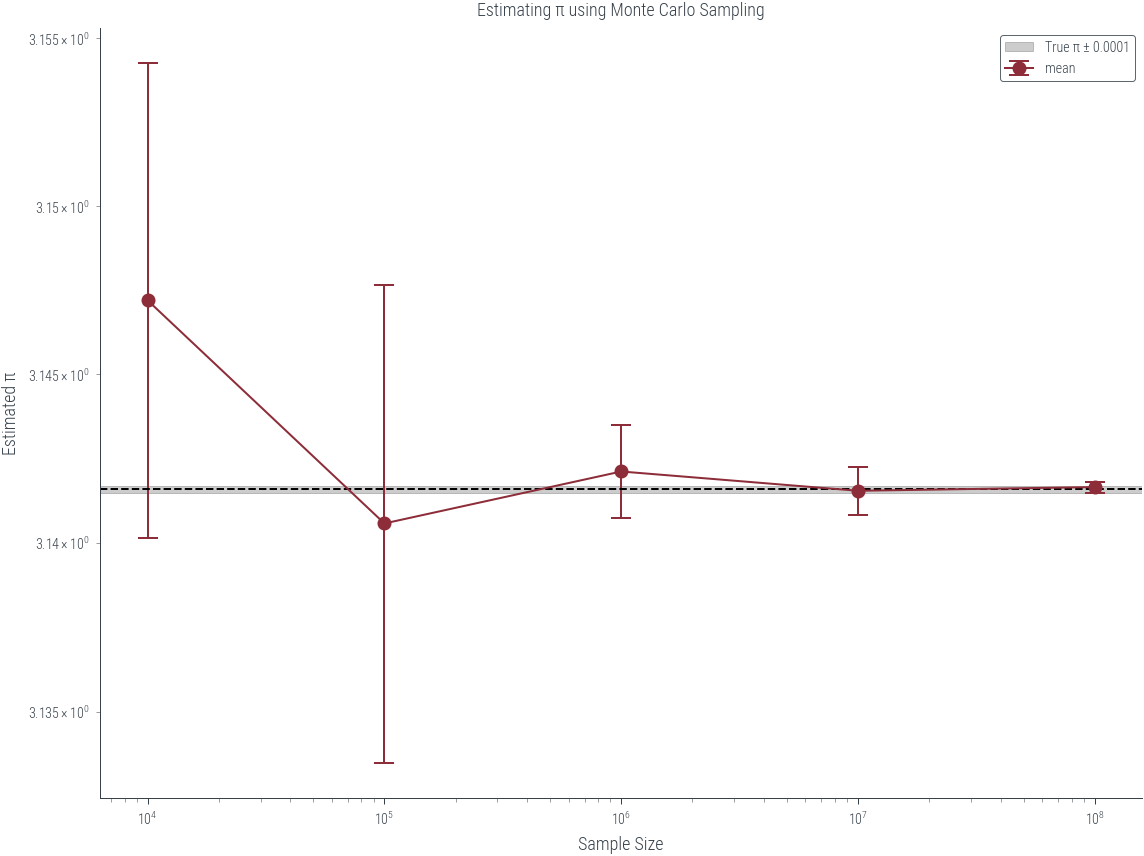

In [47]:
# Plot only 10^4 and higher
plt.figure(figsize=(8, 6))
subset = df_grouped.query("N >= 10**4")
subset["mean"].plot(yerr=subset["std"], capsize=5, marker="o")
plt.xlabel("Sample Size")
plt.ylabel("Estimated π")
plt.title("Estimating π using Monte Carlo Sampling")
# log scale on x-axis
plt.xscale("log")
plt.yscale("log")

plt.axhline(true_pi, color="black", linestyle="--")

# plot true_pi +- 0.0001
plt.axhspan(true_pi - 0.0001, true_pi + 0.0001, color="black", alpha=0.2, label="True π ± 0.0001")
plt.legend()

,mean,std
N,,
10000,3.147200,0.007065
100000,3.140580,0.007081
1000000,3.142121,0.001377
10000000,3.141548,0.000712
